In [4]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
# Configuration des GPUs et CPUs
config = tf.compat.v1.ConfigProto(device_count={'GPU': 2, 'CPU': 4})
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess);

In [6]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [7]:
print(x_train.shape)

(50000, 32, 32, 3)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# On utilise l'augmentation des données
datagen.fit(x_train)

In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [10]:
# train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8735 - accuracy: 0.3154 - val_loss: 1.7999 - val_accuracy: 0.3629
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7078 - accuracy: 0.3842 - val_loss: 1.6926 - val_accuracy: 0.3881
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6230 - accuracy: 0.4132 - val_loss: 1.6145 - val_accuracy: 0.4142
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5649 - accuracy: 0.4361 - val_loss: 1.5393 - val_accuracy: 0.4491
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5277 - accuracy: 0.4497 - val_loss: 1.5192 - val_accuracy: 0.4536
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4887 - accuracy: 0.4605 - val_loss: 1.5470 - val_accuracy: 0.4530
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4570 - accuracy: 0.4757 - val_loss: 1.5657 - val_accuracy

In [15]:
import tensorflow as tf

model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dropout(0.05))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dropout(0.05))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same'))
model2.add(tf.keras.layers.Activation('relu'))
model2.add(tf.keras.layers.Dropout(0.05))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(512, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dropout(0.1))
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
# train the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

model2.fit(datagen.flow(x_train, y_train), epochs=13, batch_size=16, validation_data=(x_test, y_test),  callbacks=callbacks_list)

Epoch 1/13
1561/1563 [============================>.] - ETA: 0s - loss: 1.9221 - accuracy: 0.3114
Epoch 1: val_accuracy improved from -inf to 0.41910, saving model to best_model.hdf5
1563/1563 [==============================] - 47s 28ms/step - loss: 1.9219 - accuracy: 0.3114 - val_loss: 1.5764 - val_accuracy: 0.4191
Epoch 2/13
1561/1563 [============================>.] - ETA: 0s - loss: 1.6373 - accuracy: 0.4052
Epoch 2: val_accuracy improved from 0.41910 to 0.48410, saving model to best_model.hdf5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.6371 - accuracy: 0.4053 - val_loss: 1.4109 - val_accuracy: 0.4841
Epoch 3/13
1561/1563 [============================>.] - ETA: 0s - loss: 1.5327 - accuracy: 0.4439
Epoch 3: val_accuracy improved from 0.48410 to 0.51110, saving model to best_model.hdf5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5326 - accuracy: 0.4440 - val_loss: 1.3572 - val_accuracy: 0.5111
Epoch 4/13
1561/1563 [==================

In [17]:
predict = model2.predict(x_test, 10)
print(predict)

model2.evaluate(x_test, y_test)

1000/1000 [==============================] - 3s 3ms/step
[[9.46834497e-03 2.61800699e-02 1.20604308e-02 ... 1.19574377e-02
  1.42637968e-01 6.73663020e-02]
 [1.30484998e-01 3.75611931e-01 9.82134254e-04 ... 4.11744433e-04
  4.72807854e-01 1.83190834e-02]
 [1.44351423e-01 3.69516969e-01 4.36188839e-03 ... 3.03348503e-03
  4.11911577e-01 5.72120547e-02]
 ...
 [8.56954721e-04 1.23072870e-03 2.66650505e-02 ... 1.21840544e-01
  6.80700829e-03 3.73316742e-03]
 [1.35177433e-01 5.72424531e-01 1.73820239e-02 ... 6.01774752e-02
  2.39133649e-02 1.17985256e-01]
 [6.24397144e-05 2.79844571e-05 4.08744439e-03 ... 9.13076997e-01
  1.22008873e-06 1.83603857e-04]]
313/313 [==============================] - 1s 3ms/step - loss: 1.0387 - accuracy: 0.6329


[1.038693904876709, 0.6328999996185303]

1/1 [==============================] - 0s 180ms/step


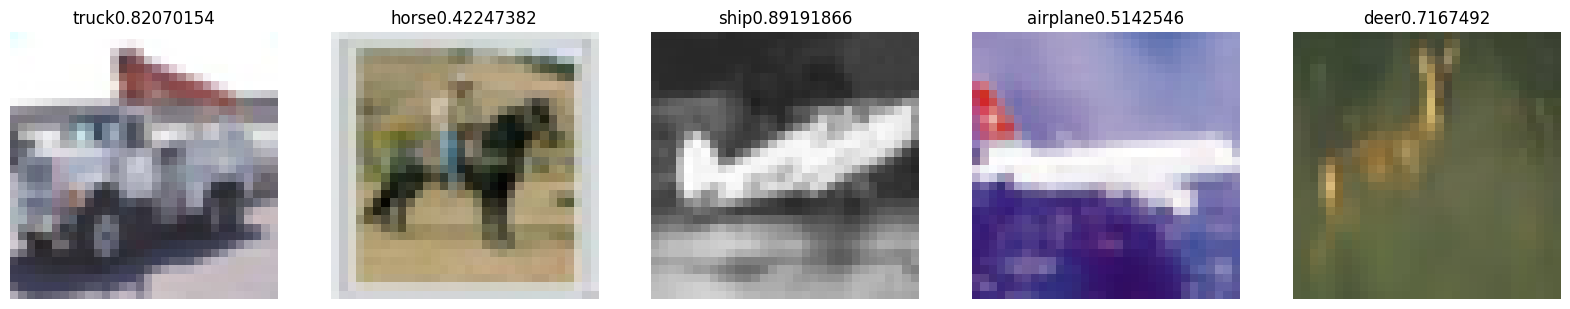

In [18]:
import matplotlib.pyplot as plt
import random

images = x_test[random.sample(range(0, len(x_test)), 5)]
# predict the class of each image
predictions = model2.predict(images)
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# show the images
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)
    plt.imshow(images[i])
    plt.axis('off')
    best = max(predictions[i])
    class_name = classes[list(predictions[i]).index(best)]
    plt.title(class_name+ str(best))